<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [4]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

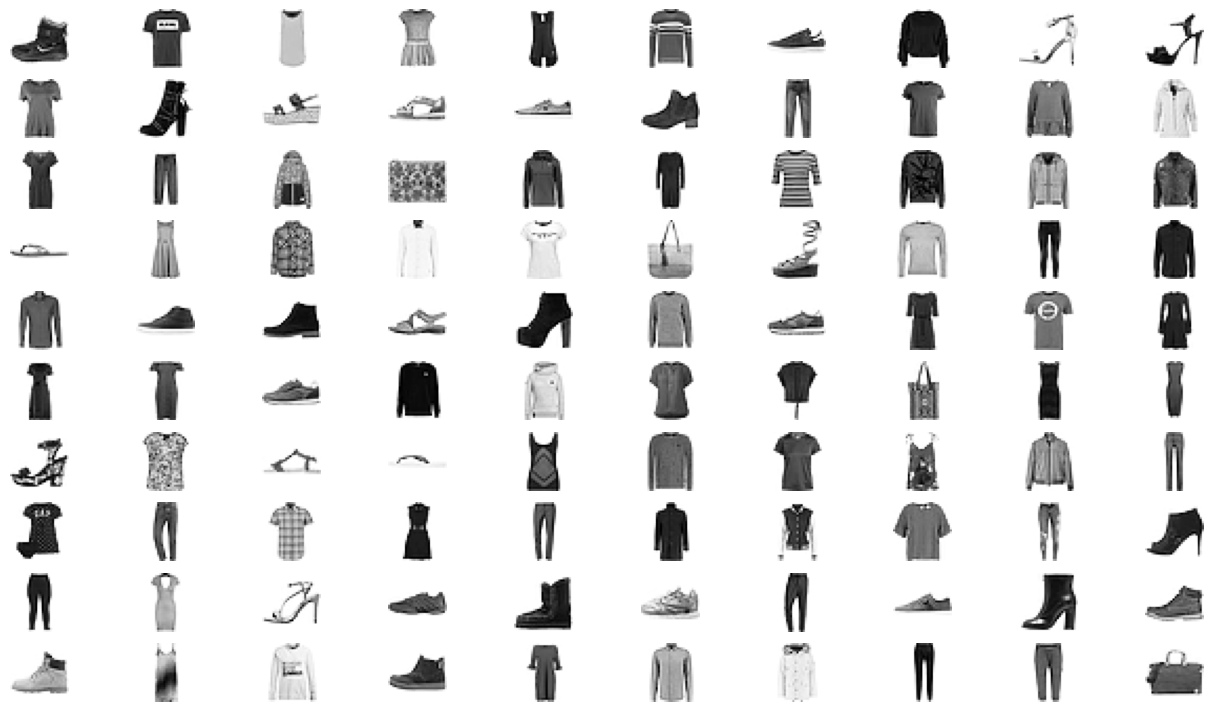

In [5]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

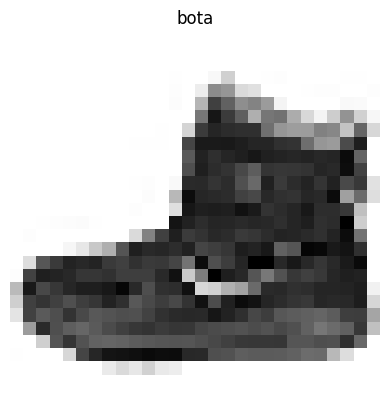

In [6]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

fig = plt.figure()
ax = fig.add_subplot()
ax.axis('off')
ax.imshow(data_X_train[0], cmap='Greys')
ax.set_title(category_list[data_y_train[0]])
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [7]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14,:])


[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [8]:
# Alumno: Normalizar los datos entre 0 y 1

data_X_train_norm = data_X_train/255
data_X_test_norm = data_X_test/255

In [9]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)

print(data_X_train_norm.shape[0])

60000


In [10]:
# Alumno: Imprimir la dimension de la imagen

print(data_X_train[0].shape)

(28, 28)


In [11]:
# Alumno: En estas imagenes sin escalas de grieses no vienen con el canal especificado
# Deberia ser (28, 28, 1) para poder utilizar en una red CNN
# Agregar el [samples][pixels][width][height]

X_train = data_X_train_norm.reshape(data_X_train_norm.shape[0], data_X_train_norm.shape[1], data_X_train_norm.shape[2], 1).astype('float32')
X_test = data_X_test_norm.reshape(data_X_test_norm.shape[0], data_X_test_norm.shape[1], data_X_test_norm.shape[2], 1).astype('float32')

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

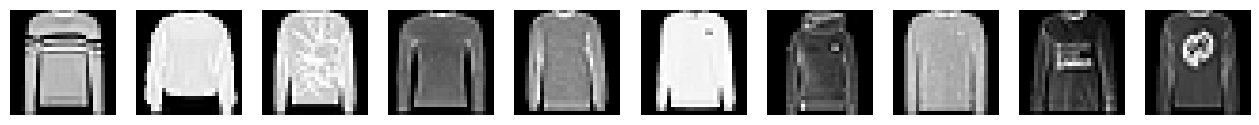

In [12]:
# Alumno: Explor los primeros diez puloveres del dataset de train

fig = plt.figure(figsize=(16,9))

j=0

for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    ax.axis('off')
    while True:
      if category_list[data_y_train[j]] == 'pulover':
          ax.imshow(data_X_train[j], cmap='gray')
          j+=1
          break
      j+=1
plt.show()



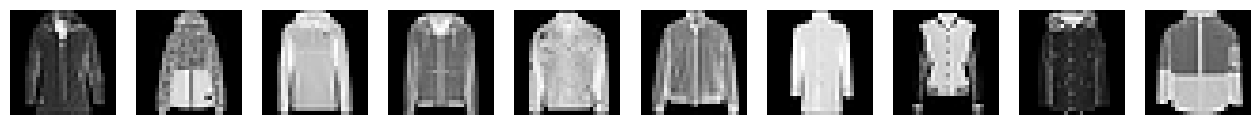

In [13]:
# Alumno: Explor los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16,9))
j=0

for i in range(10):
  ax = fig.add_subplot(1,10,i+1)
  ax.axis('off')
  while True:
    if category_list[data_y_train[j]] == 'saco':
      ax.imshow(data_X_train[j], cmap='gray')
      j+=1
      break
    j+=1
plt.show()


Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [14]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

y_test.shape

(10000, 10)

In [15]:
# input shape
input_shape = X_train.shape[1:]

input_shape

(28, 28, 1)

In [16]:
# output shape
out_shape = y_train.shape[1]

In [17]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D # Sino funciona este, usar el siguiente
#from keras.layers.convolutional import Conv2D, MaxPooling2D

# Alumno, crear un modelo con la cantidad de capas de CONV y POOL
# que vea que da mejor resultado
model = Sequential()

drop=0.2

model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=drop))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=drop))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                100416    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [18]:
# Alumno: entrenar el modelo

history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 16s 5ms/step - loss: 0.7676 - accuracy: 0.7290 - val_loss: 0.4300 - val_accuracy: 0.8461
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4640 - accuracy: 0.8373 - val_loss: 0.3575 - val_accuracy: 0.8718
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4003 - accuracy: 0.8619 - val_loss: 0.3277 - val_accuracy: 0.8801
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3576 - accuracy: 0.8759 - val_loss: 0.3072 - val_accuracy: 0.8875
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3329 - accuracy: 0.8831 - val_loss: 0.2931 - val_accuracy: 0.8939
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3107 - accuracy: 0.8900 - val_loss: 0.2880 - val_accuracy: 0.8966
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2953 - accuracy: 0.8963 - val_loss: 0.2752 - val_accuracy: 0.8982
Epoch

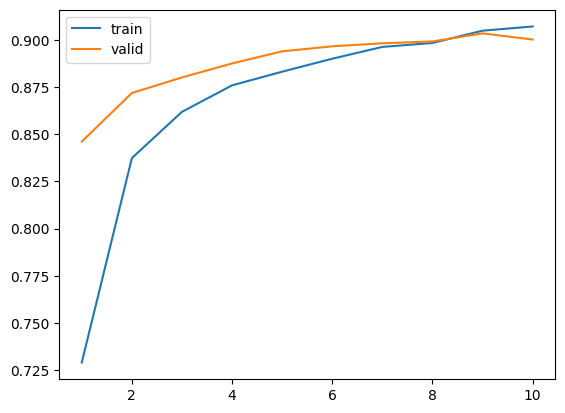

In [19]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [24]:
# Alumno: Predecir las probabilidades del dataset X_test

y_hat_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob, axis=1)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [27]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2867 - accuracy: 0.8954


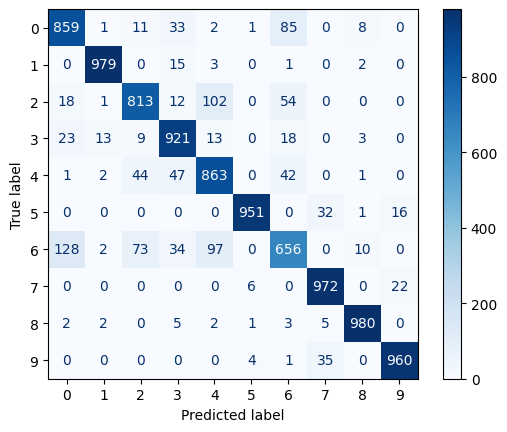

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [32]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [39]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

X_test_sacos = X_test[rank_saco]
y_test_sacos = y_test[rank_saco]

In [41]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_sacos, y_test_sacos)
scores[1]

1/1 [==============================] - 0s 93ms/step - loss: 1.2880 - accuracy: 0.5000


0.8953999876976013

In [44]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat_saco_prob = model.predict(X_test_sacos)

y_hat_saco = y_hat_saco_prob.argmax(axis=1)

y_hat_saco

1/1 [==============================] - 0s 61ms/step


array([2, 4, 2, 6, 4, 4, 4, 2, 4, 2])

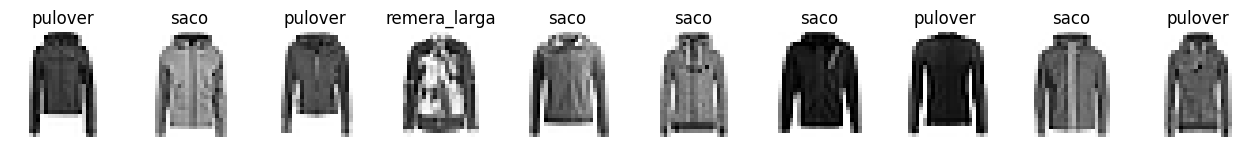

In [51]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))
j=0
for i in range(len(rank_saco)):
  ax = fig.add_subplot(1,10,i+1)
  ax.axis('off')
  ax.imshow(X_test_sacos[j], cmap='Greys')
  ax.set_title(category_list[y_hat_saco[j]])
  j+=1
plt.show()

